In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict

In [22]:
curr = pd.read_excel(r'C:\Users\hp\Documents\Time Series\Currency.xlsx', index_col='Date', parse_dates=True)

In [23]:
curr.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-03-08,82.12,82.21,82.38,82.08,2.96M,0.0011
2023-03-06,82.03,81.95,82.07,81.71,3.35M,-0.0006
2023-03-03,82.07,82.55,82.60,82.02,3.95M,-0.0076
2023-03-02,82.71,82.60,82.72,82.60,1.38M,0.0011
2023-03-01,82.61,82.64,82.75,82.49,2.45M,-0.0012


In [24]:
curr.tail()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2015-02-05,61.97,62.15,62.24,61.93,1.18M,-0.0011
2015-02-04,62.04,61.90,62.15,61.82,1.19M,0.0008
2015-02-03,61.99,61.92,62.14,61.90,1.42M,-0.0021
2015-02-02,62.12,62.31,62.35,62.05,1.03M,-0.0018
2015-01-30,62.23,62.19,62.35,62.00,1.63M,0.0011


In [25]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1968 entries, 2023-03-08 to 2015-01-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1968 non-null   float64
 1   Open    1968 non-null   float64
 2   High    1968 non-null   float64
 3   Low     1968 non-null   float64
 4   Volume  1968 non-null   object 
 5   Chg%    1968 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.6+ KB


In [26]:
curr = curr.sort_index(ascending=[True])

In [27]:
curr.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2015-01-30,62.23,62.19,62.35,62.00,1.63M,0.0011
2015-02-02,62.12,62.31,62.35,62.05,1.03M,-0.0018
2015-02-03,61.99,61.92,62.14,61.90,1.42M,-0.0021
2015-02-04,62.04,61.90,62.15,61.82,1.19M,0.0008
2015-02-05,61.97,62.15,62.24,61.93,1.18M,-0.0011


In [28]:
curr.tail()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-03-01,82.61,82.64,82.75,82.49,2.45M,-0.0012
2023-03-02,82.71,82.60,82.72,82.60,1.38M,0.0011
2023-03-03,82.07,82.55,82.60,82.02,3.95M,-0.0076
2023-03-06,82.03,81.95,82.07,81.71,3.35M,-0.0006
2023-03-08,82.12,82.21,82.38,82.08,2.96M,0.0011


In [29]:
curr.drop(['Open', 'High', 'Low', 'Volume', 'Chg%'], axis=1, inplace=True)

In [30]:
curr.head()

,Price
Date,
2015-01-30,62.23
2015-02-02,62.12
2015-02-03,61.99
2015-02-04,62.04
2015-02-05,61.97


In [31]:
curr.tail()

,Price
Date,
2023-03-01,82.61
2023-03-02,82.71
2023-03-03,82.07
2023-03-06,82.03
2023-03-08,82.12


In [32]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1968 entries, 2015-01-30 to 2023-03-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1968 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB


In [33]:
#curr = curr.resample('D').ffill()

curr = curr.asfreq('D')
#interpolated = upsampled.interpolate(method='linear')

In [34]:
curr.head()

,Price
Date,
2015-01-30,62.23
2015-01-31,NaN
2015-02-01,NaN
2015-02-02,62.12
2015-02-03,61.99


In [35]:
curr.tail()

,Price
Date,
2023-03-04,NaN
2023-03-05,NaN
2023-03-06,82.03
2023-03-07,NaN
2023-03-08,82.12


In [36]:
curr = curr.interpolate(method='linear')

In [37]:
curr.head()

,Price
Date,
2015-01-30,62.230000
2015-01-31,62.193333
2015-02-01,62.156667
2015-02-02,62.120000
2015-02-03,61.990000


In [38]:
curr.tail()

,Price
Date,
2023-03-04,82.056667
2023-03-05,82.043333
2023-03-06,82.030000
2023-03-07,82.075000
2023-03-08,82.120000


In [39]:
curr_train = curr.loc[:'2022']
curr_test  = curr.loc['2023':]

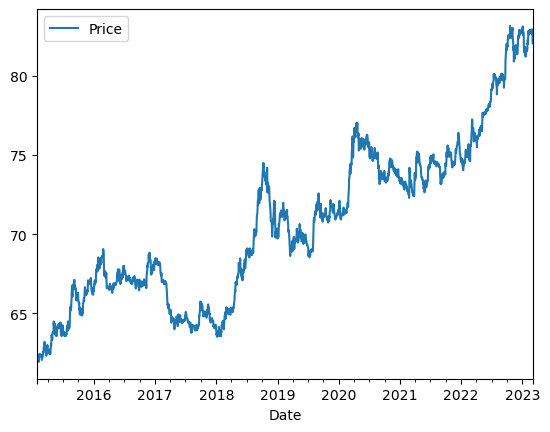

In [40]:
fig, ax = plt.subplots()
curr.plot(ax=ax)
plt.show()

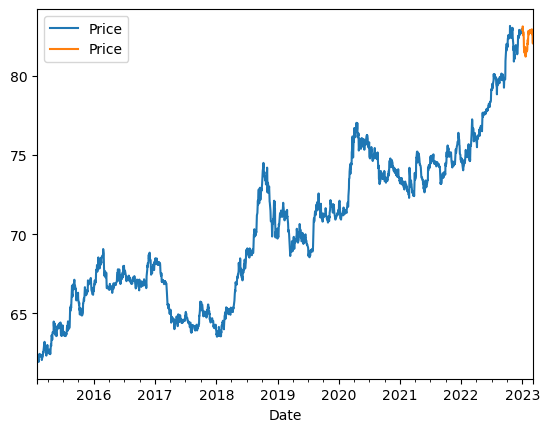

In [41]:
fig, ax1 = plt.subplots()
curr_train.plot(ax=ax1)
curr_test.plot(ax=ax1)
plt.show()

In [42]:
result = adfuller(curr)
print(result)

(-0.45049516348198837, 0.9013204151563168, 1, 2958, {'1%': -3.432562638221284, '5%': -2.86251759835993, '10%': -2.567290402173133}, -1920.2637591081439)


In [43]:
result = adfuller(curr.diff().dropna())
print(result)

(-50.12975026615455, 0.0, 0, 2958, {'1%': -3.432562638221284, '5%': -2.86251759835993, '10%': -2.567290402173133}, -1920.381138381611)


In [44]:
result = adfuller(np.sqrt(curr))
print(result)

(-0.546852453212592, 0.8825447773311461, 1, 2958, {'1%': -3.432562638221284, '5%': -2.86251759835993, '10%': -2.567290402173133}, -18498.279654679252)


In [45]:
result = adfuller(np.log(curr))
print(result)

(-0.6437632022675468, 0.860783616140159, 1, 2958, {'1%': -3.432562638221284, '5%': -2.86251759835993, '10%': -2.567290402173133}, -26935.606231197497)


In [46]:
curr_diff = curr.diff().dropna()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


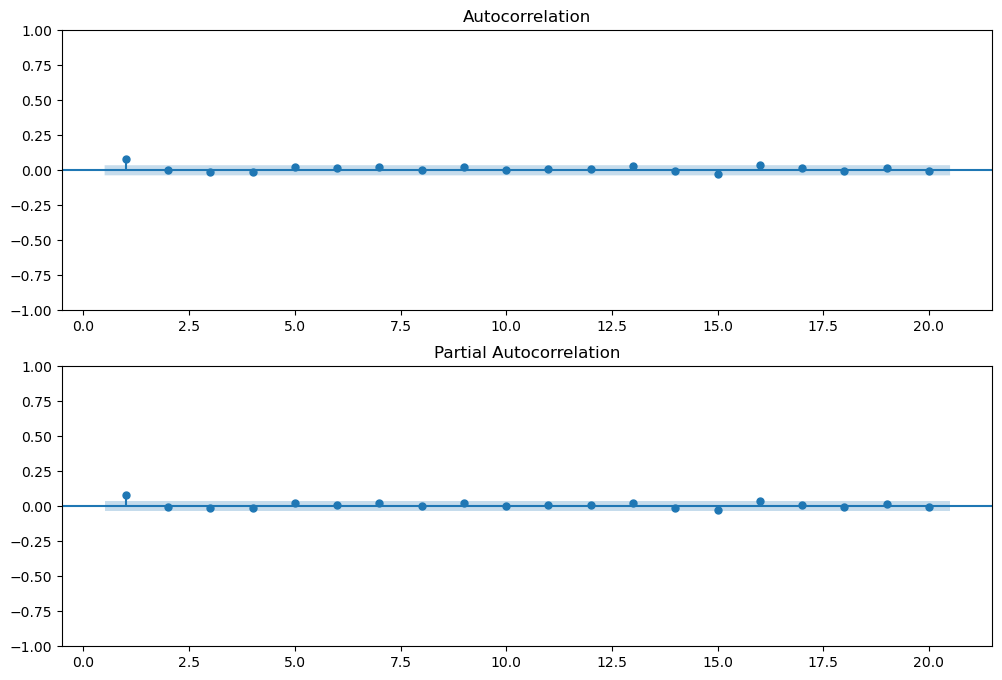

In [47]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

plot_acf(curr_diff, lags=20, zero=False, ax=ax1)

plot_pacf(curr_diff, lags=20, zero=False, ax=ax2)

plt.show()

In [57]:
order_aic_bic=[]


            
            
for p in range(5):
    for q in range(5):
        try:
            model = ARIMA(curr_train, order=(p,1,q))
            results = model.fit()
            
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

In [58]:
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])

print(order_df.sort_values('aic'))

    p  q          aic          bic
1   0  1 -1925.378196 -1913.438788
5   1  0 -1925.119296 -1913.179889
10  2  0 -1923.443216 -1905.534105
2   0  2 -1923.384652 -1905.475541
6   1  1 -1923.382607 -1905.473496
15  3  0 -1921.756096 -1897.877281
3   0  3 -1921.623414 -1897.744599
11  2  1 -1921.602937 -1897.724123
7   1  2 -1921.378924 -1897.500109
4   0  4 -1920.184068 -1890.335550
22  4  2 -1920.169325 -1878.381400
13  2  3 -1920.096936 -1884.278715
20  4  0 -1920.004219 -1890.155701
16  3  1 -1919.729519 -1889.881001
9   1  4 -1919.552279 -1883.734058
12  2  2 -1919.449338 -1889.600820
8   1  3 -1919.384711 -1889.536193
21  4  1 -1918.056921 -1882.238700
18  3  3 -1917.741984 -1875.954058
17  3  2 -1917.727981 -1881.909759
14  2  4 -1917.665456 -1875.877531
23  4  3 -1917.271505 -1869.513876
24  4  4 -1915.847514 -1862.120182
19  3  4 -1915.132753 -1867.375125
0   0  0 -1905.758289 -1899.788586


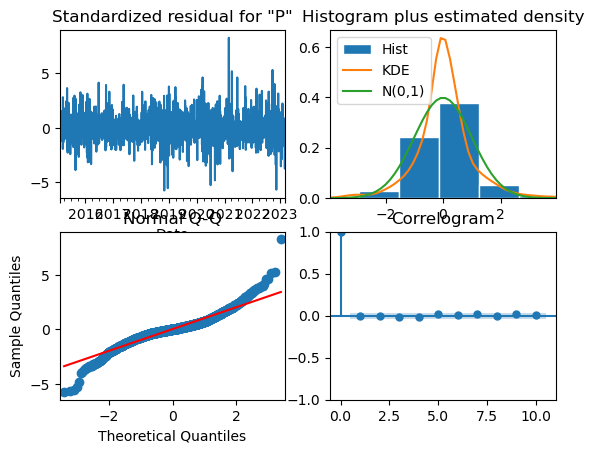

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2960
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 981.266
Date:                Tue, 04 Apr 2023   AIC                          -1958.532
Time:                        22:22:16   BIC                          -1946.547
Sample:                    01-30-2015   HQIC                         -1954.218
                         - 03-08-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0828      0.014      5.848      0.000       0.055       0.111
sigma2         0.0302      0.000     73.120      0.000       0.029       0.031
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [51]:
model = ARIMA(curr_train, order=(0,1,1))
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

In [59]:
order_aic_bic2=[]


            
            
for p in range(5,9):
    for q in range(5,9):
        try:
            model = ARIMA(curr_train, order=(p,1,q))
            results = model.fit()
            
            order_aic_bic2.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels

In [60]:
order_df2 = pd.DataFrame(order_aic_bic2, columns=['p', 'q', 'aic', 'bic'])

print(order_df2.sort_values('aic'))

    p  q          aic          bic
3   5  8 -1916.819319 -1833.243468
4   6  5 -1913.684056 -1842.047613
0   5  5 -1913.440334 -1847.773595
1   5  6 -1913.397950 -1841.761507
2   5  7 -1913.159287 -1835.553141
7   6  8 -1912.739551 -1823.193997
8   7  5 -1911.044287 -1833.438141
15  8  8 -1909.886155 -1808.401194
12  8  5 -1909.461501 -1825.885650
11  7  8 -1908.249883 -1812.734626
6   6  7 -1908.234361 -1824.658511
9   7  6 -1908.108107 -1824.532257
5   6  6 -1906.397694 -1828.791548
10  7  7 -1906.060661 -1816.515107
13  8  6 -1905.795989 -1816.250436
14  8  7 -1904.336937 -1808.821680


In [54]:
order_aic_bic3=[]
            
for p in range(9,12):
    for q in range(9,12):
        try:
            model = ARIMA(curr_train, order=(p,1,q))
            results = model.fit()
            
            order_aic_bic3.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood op

In [55]:
order_df3 = pd.DataFrame(order_aic_bic3, columns=['p', 'q', 'aic', 'bic'])

print(order_df3.sort_values('aic'))

    p   q          aic          bic
3  10   9 -1941.683649 -1821.831516
1   9  10 -1940.092527 -1820.240394
2   9  11 -1938.884817 -1813.040077
6  11   9 -1938.827028 -1812.982289
4  10  10 -1937.546542 -1811.701802
5  10  11 -1937.184847 -1805.347501
7  11  10 -1935.917907 -1804.080561
8  11  11 -1935.188470 -1797.358517
0   9   9 -1933.414405 -1819.554879


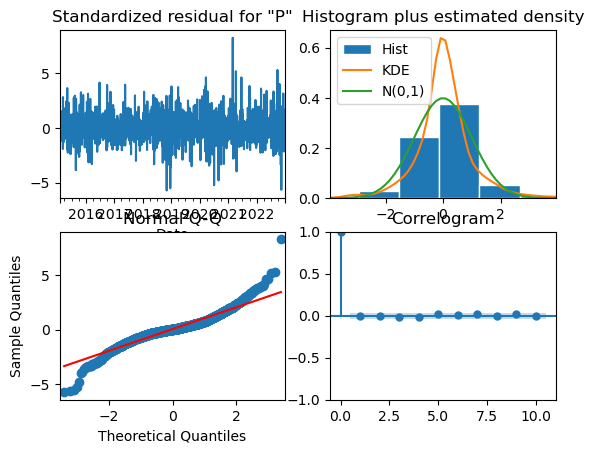

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2893
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 964.689
Date:                Tue, 04 Apr 2023   AIC                          -1925.378
Time:                        22:36:35   BIC                          -1913.439
Sample:                    01-30-2015   HQIC                         -1921.076
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0866      0.014      6.097      0.000       0.059       0.114
sigma2         0.0300      0.000     72.619      0.000       0.029       0.031
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [61]:
model = ARIMA(curr_train, order=(0,1,1))
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

In [62]:
forecast = results.get_forecast(steps=len(curr_test), dynamic=True)
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
dates = curr_test.index

In [63]:
print(len(curr_test))

67


In [64]:
print(len(mean))

67


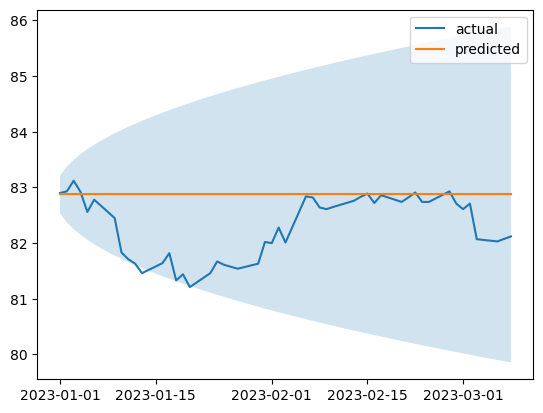

In [65]:
plt.figure()

plt.plot(curr_test.index, curr_test, label='actual')

plt.plot(dates, mean, label='predicted')

plt.fill_between(dates,conf_int['lower Price'], conf_int['upper Price'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [66]:
rms = sqrt(mean_squared_error(curr_test.Price,mean))
print(rms)

0.8227862968572234
